# Read the dataset

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

books_df = pd.read_csv('../data/cleaned/Amazon_Books_Cleaned.csv', index_col=0)
books_df


,Title,Author,Main Genre,Sub Genre,Type,Price,Rating,Number_people_rated,URLs,Rating category
0,The Complete Novel of Sherlock Holmes,Arthur Conan Doyle,"Arts, Film & Photography",Cinema & Broadcast,Paperback,169.00,4.4,19923.0,https://www.amazon.in/Complete-Novels-Sherlock...,Good
1,Black Holes (L) : The Reith Lectures [Paperbac...,Stephen Hawking,"Arts, Film & Photography",Cinema & Broadcast,Paperback,99.00,4.5,7686.0,https://www.amazon.in/Black-Holes-Lectures-Ste...,Good
2,The Kite Runner,Khaled Hosseini,"Arts, Film & Photography",Cinema & Broadcast,Kindle Edition,175.75,4.6,50016.0,https://www.amazon.in/Kite-Runner-Khaled-Hosse...,Good
3,Greenlights: Raucous stories and outlaw wisdom...,Matthew McConaughey,"Arts, Film & Photography",Cinema & Broadcast,Paperback,389.00,4.6,32040.0,https://www.amazon.in/Greenlights-Raucous-stor...,Good
4,The Science of Storytelling: Why Stories Make ...,Will Storr,"Arts, Film & Photography",Cinema & Broadcast,Paperback,348.16,4.5,1707.0,https://www.amazon.in/Science-Storytelling-Wil...,Good
...,...,...,...,...,...,...,...,...,...,...
7923,Insight Guides Poland (Travel Guide with Free ...,Insight Travel Guide,Travel,Travel & Holiday Guides,Paperback,1326.00,4.7,16.0,https://www.amazon.in/Insight-Guides-Poland-Tr...,Good
7924,Lonely Planet India 19 (Travel Guide),Anirban Mahapatra,Travel,Travel & Holiday Guides,Paperback,850.00,4.4,187.0,https://www.amazon.in/Lonely-Planet-India-Trav...,Good
7925,Eyewitness Travel Phrase Book French (EW Trave...,DK,Travel,Travel & Holiday Guides,Paperback,307.00,4.5,168.0,https://www.amazon.in/Eyewitness-Travel-Phrase...,Good
7926,Lonely Planet Australia (Travel Guide),Andrew Bain,Travel,Travel & Holiday Guides,Kindle Edition,1814.50,4.7,267.0,https://www.amazon.in/Lonely-Planet-Australia-...,Good


# Average number of best books by genre and number of votes

C:\Users\asmal\AppData\Local\Temp\ipykernel_13272\246718724.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  genre_ranking = genre_ranking.apply(


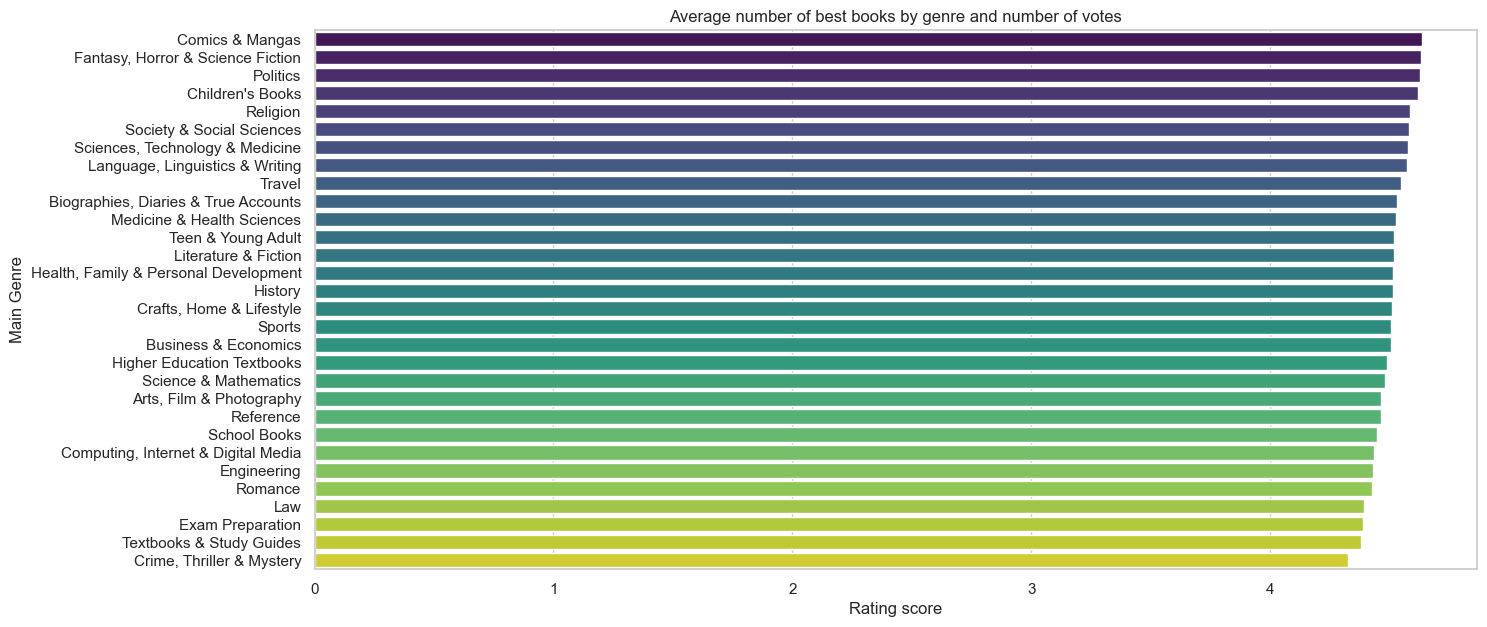

In [97]:
genre_ranking = books_df.groupby('Main Genre')

genre_ranking = genre_ranking.apply(
    lambda df: (df['Rating'] * df['Number_people_rated']).sum() / df['Number_people_rated'].sum()
).reset_index(name='Rating') 
genre_ranking = genre_ranking.sort_values(by='Rating', ascending=False).reset_index(drop=True)

sns.set_theme(style='whitegrid')

plt.figure(figsize=(15, 7))
sns.barplot(x='Rating', y='Main Genre', data=genre_ranking, palette='viridis', hue='Main Genre')

plt.xlabel('Rating score')
plt.ylabel('Main Genre')
plt.title('Average number of best books by genre and number of votes')
plt.show()

# Average prices for each genre

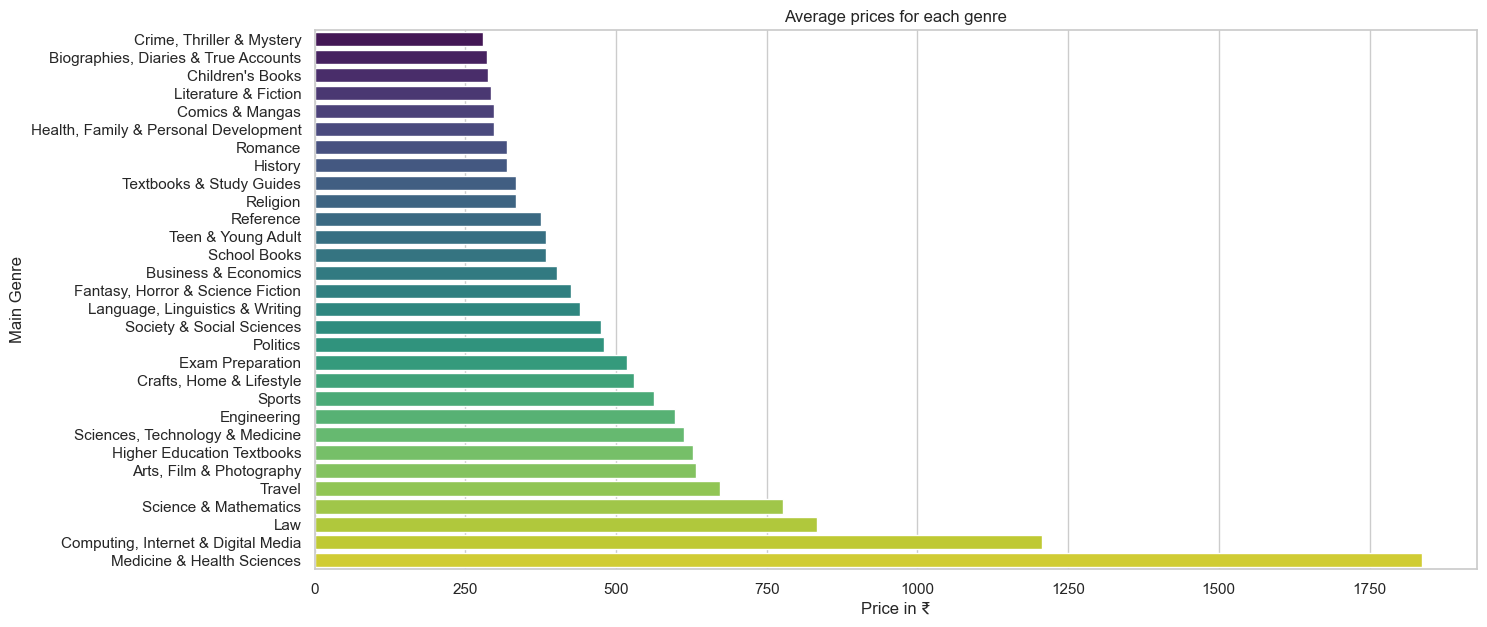

In [98]:
priceAvg_genre = books_df.groupby('Main Genre')['Price'].mean().reset_index()
priceAvg_genre = priceAvg_genre.sort_values(by='Price')
priceAvg_genre.reset_index(drop=True)

sns.set_theme(style='whitegrid')
plt.figure(figsize=(15,7))
sns.barplot(x='Price', y='Main Genre', data=priceAvg_genre, palette='viridis', hue='Main Genre')
plt.xlabel('Price in ₹')
plt.ylabel('Main Genre')
plt.title('Average prices for each genre')
plt.show()

# Top 10 Authors with most expensive books

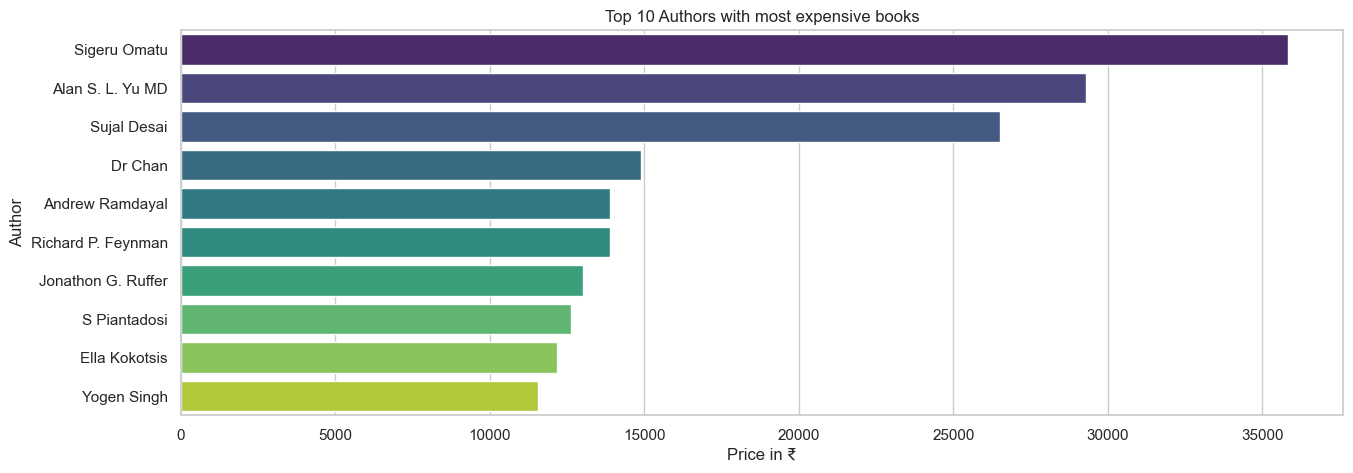

In [99]:
priceAvg_author = books_df.groupby('Author')['Price'].mean().reset_index()
priceAvg_author = priceAvg_author.sort_values(by='Price', ascending=False)
priceAvg_author.reset_index(drop=True)

sns.set_theme(style='whitegrid')
plt.figure(figsize=(15,5))
sns.barplot(x='Price', y='Author', data=priceAvg_author[:10], palette='viridis', hue='Author')
plt.xlabel('Price in ₹')
plt.ylabel('Author')
plt.title('Top 10 Authors with most expensive books')
plt.show()

# Scatter plot of genres in relation to price

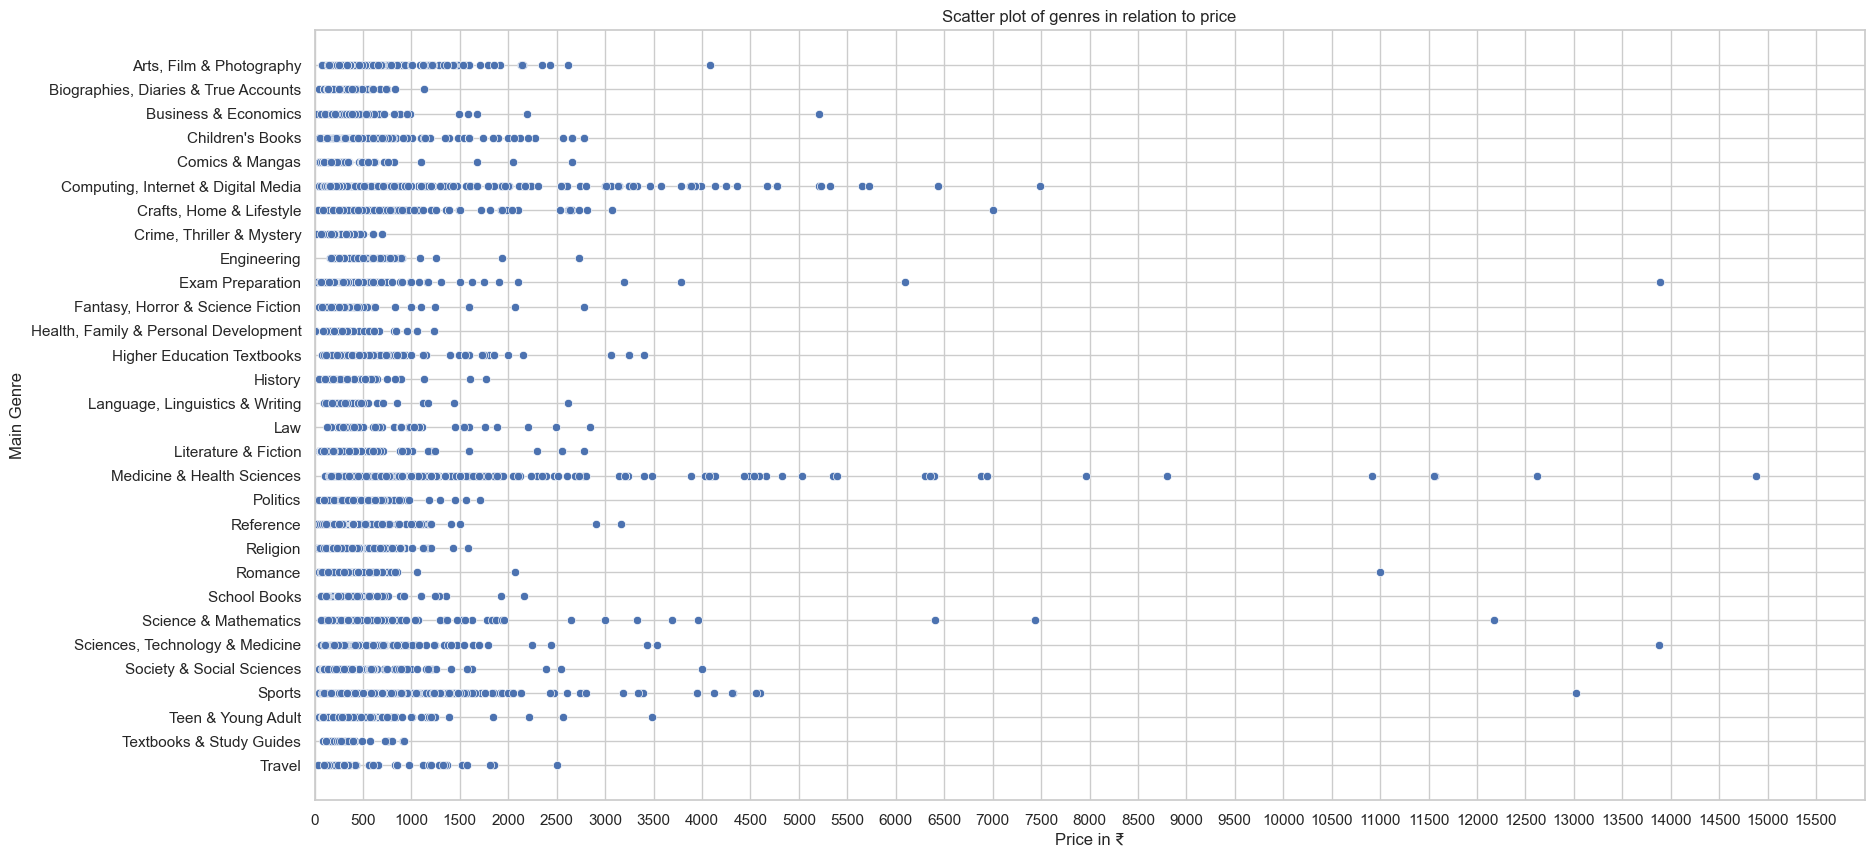

In [100]:
sns.set_theme(style='whitegrid')


plt.figure(figsize=(20,10))
sns.scatterplot(x='Price', y='Main Genre', data=books_df)
plt.xlim(0, 16000)
plt.xticks(range(0, 16000, 500))

plt.xlabel('Price in ₹')
plt.ylabel('Main Genre')
plt.title('Scatter plot of genres in relation to price')
plt.show()